# Assignment 1
This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.

### Environment setup

The following code reads the train and test data (provided along with this template) and outputs the data and labels as numpy arrays. Use these variables in your code.

---
#### Note on conventions
In mathematical notation, the convention is tha data matrices are column-indexed, which means that a input data $x$ has shape $[d, n]$, where $d$ is the number of dimensions and $n$ is the number of data points, respectively.

Programming languages have a slightly different convention. Data matrices are of shape $[n, d]$. This has the benefit of being able to access the ith data point as a simple `data[i]`.

What this means is that you need to be careful about your handling of matrix dimensions. For example, while the covariance matrix (of shape $[d,d]$) for input data $x$ is calculated as $(x-u)(x-u)^T$, while programming you would do $(x-u)^T(x-u)$ to get the correct output shapes.

In [2]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


# Questions
---
## 1.3.1 Representation
The next code cells, when run, should plot the eigen value spectrum of the covariance matrices corresponding to the mentioned samples. Normalize the eigen value spectrum and only show the first 100 values.

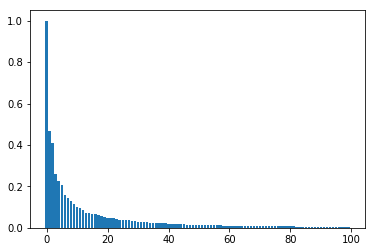

In [118]:
# Samples corresponding to the last digit of your roll number (plot a)
# Roll number = 20171025
mat_5 = []
for i in range(0,6000):
    if(train_labels[i]==5.0):
        mat_5.append(train_data[i])
input_matrix = np.asarray(mat_5)
values,vectors = np.linalg.eig(np.cov(input_matrix.T))


idx = values.real
idxmax, idxmin = idx.max(), idx.min()
idx = (idx - idxmin)/(idxmax - idxmin)
x = []
y = []

for i in range(0, 100):
    x.append(i)
    y.append(values[i]/max(values[0:100]))
plt.bar(x,y) 
plt.show()



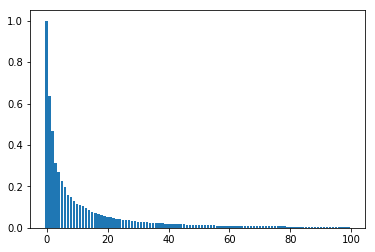

In [116]:
# Samples corresponding to the last digit of (your roll number + 1) % 10 (plot b)
# Roll number = 20171025
mat_5 = []
for i in range(0,6000):
    if(train_labels[i]==6.0):
        mat_5.append(train_data[i])
input_matrix = np.asarray(mat_5)
values,vectors = np.linalg.eig(np.cov(input_matrix.T))


idx = values.real
idxmax, idxmin = idx.max(), idx.min()
idx = (idx - idxmin)/(idxmax - idxmin)
x = []
y = []

for i in range(0, 100):
    x.append(i)
    y.append(values[i]/max(values[0:100]))
plt.bar(x,y) 
plt.show()



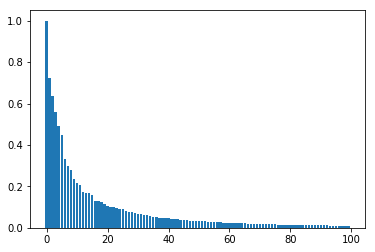

In [117]:
# All training data (plot c)
import matplotlib.pyplot as plt
import numpy as np

input_matrix = np.asarray(train_data)
values,vectors = np.linalg.eig(np.cov(input_matrix.T))


idx = values.real
idxmax, idxmin = idx.max(), idx.min()
idx = (idx - idxmin)/(idxmax - idxmin)
x = []
y = []

for i in range(0, 100):
    x.append(i)
    y.append(values[i]/max(values[0:100]))
plt.bar(x,y) 
plt.show()

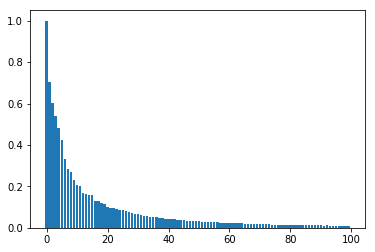

In [128]:
# Randomly selected 50% of the training data (plot d)
indices = np.random.choice(train_data.shape[0], 3000, replace = False)
mat = []
for i in indices:
    mat.append(train_data[i])

input_matrix = np.asarray(mat)
values,vectors = np.linalg.eig(np.cov(input_matrix.T))


idx = values.real
idxmax, idxmin = idx.max(), idx.min()
idx = (idx - idxmin)/(idxmax - idxmin)
x = []
y = []

for i in range(0, 100):
    x.append(i)
    y.append(values[i]/max(values[0:100]))
plt.bar(x,y) 
plt.show()

### 1.3.1 Question 1
- Are plots a and b different? Why?
- Are plots b and c different? Why?
- What are the approximate ranks of each plot?

---
Your answers here (double click to edit)
1. Plots a and b are almost the same, but the difference is that b is a little less steeper than a (immediate values after 1 are around 0.7 and 0.6 in b, whereas they directly start from 0.5 in a). But apart from this very small difference, they are practically the same.

2. Same as the above answer, but here, the first few largest eigen values of c are a little higher than those of b. Rest of the spectrum is very similar in both the cases.

3. We observe trivially that each plot has a minimum rank of 100, because we don't see complete zero values anywhere in any of the plots, but exact rank simply be calculated by counting all the number of non zero eigen values.

---

### 1.3.1 Question 2
- How many possible images could there be?
- What percentage is accessible to us as MNIST data?
- If we had acces to all the data, how would the eigen value spectrum of the covariance matrix look?

---
Your answers here (double click to edit)
1. We can have 2^784 images in total which is around 1.017458e+236.
2. Almost 0% is available to us (close to 10^(-200), which is negligible.
3. If we had access to all the data, it will have all equal eigen values and plot will be a constant straight line. In that case, covariance matrix will be a diagonal matrix.

---

## 1.3.2 Linear Transformation
---
### 1.3.2 Question 1
How does the eigen spectrum change if the original data was multiplied by an orthonormal matrix? Answer analytically and then also validate experimentally.

---
Analytical answer here (double click to edit)
Multiplication with an orthonormal matrix is essentially just a linear transformation. This results in all the eigen vectors being rotated by some value in space, but nothing happens to the eigen values. Hence, we expect the plots to look the same.
This is supported by the observation that both the plots are same.
---

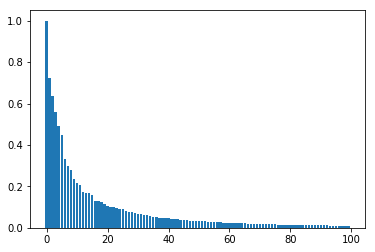

In [127]:
# Experimental validation here.
# Multiply your data (train_data) with an orthonormal matrix and plot the
# eigen value specturm of the new covariance matrix.
from scipy.stats import ortho_group
m = ortho_group.rvs(784)
prod = np.dot(train_data,m)
values, vectors = np.linalg.eig(np.cov(prod.T))

idx = values.real
idxmax, idxmin = idx.max(), idx.min()
idx = (idx - idxmin)/(idxmax - idxmin)
x = []
y = []

for i in range(0, 100):
    x.append(i)
    y.append(values[i]/max(values[0:100]))
plt.bar(x,y) 
plt.show()

### 1.3.2 Question 2
If  samples  were  multiplied  by  784 × 784  matrix  of rank 1 or 2, (rank deficient matrices), how will the eigen spectrum look like?

---
Your answer here (double click to edit)
In this case, since the rank of the multiplying rank deficient matrix is atmost 2, we can have a maxiumum of 2 non zero eigen values. Eigen spectrum will be corresponding to that, where atmost 2 values in the spectrum are non zero and rest all are zeroes.

---

### 1.3.2 Question 3
Project the original data into the first and second eigenvectors and plot in 2D

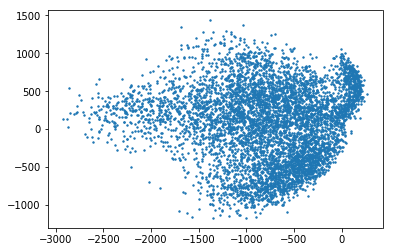

In [105]:
import numpy as np

values,vectors = np.linalg.eig(np.cov(train_data.T))

x = train_data.dot(-1*((vectors[:,0]).T).real)
y = train_data.dot(((vectors[:,1]).T).real)


plt.scatter(x,y,s=2)
plt.show()


## 1.3.3 Probabilistic View
---
In this section you will classify the test set by fitting multivariate gaussians on the train set, with different choices for decision boundaries. On running, your code should print the accuracy on your test set.

In [136]:
# Print accuracy on the test set using MLE
from collections import defaultdict
def classify(train_data, train_labels):
    classes = defaultdict(list)
    for i in range(0, len(train_data)):
        x = int(train_labels[i])
        classes[x].append(train_data[i])
    return classes

def find_max_class(classes, test_sample):
    mean = defaultdict(list)
    for i in range(0, 10):
        x = np.asarray(classes[i])
        m = np.mean(x, axis = 0)
        mean[i] = m
    
    sigma = defaultdict(list)
    for i in range(0, 10):
        x = np.cov(np.asarray(classes[i]).T)
        sigma[i] = x
    
    max_val = -1000000
    max_index = -1

    for i in range(0, 10):
        _ , value1 = np.linalg.slogdet(np.cov(classes[i]))
        sigma_inv = np.linalg.pinv(sigma[i])
        value2 = np.dot((test_sample - mean[i]).T,sigma_inv)
        value2 = np.dot(value2, (test_sample-mean[i]))
        ans = -1*(value1 + value2)
        if(max_val < ans):
            max_val = ans
            max_index = i
    return max_index


classes = classify(train_data, train_labels)
i = 0
count=0
for test_sample in test_data:
    x=find_max_class(classes, test_sample)
#     print(x, int(test_labels[i]))
    y = int(test_labels[i])
    if x == y:
        count+=1
    i+=1


print("Accuracy using MLE is")
y = str(count)
print(y + "%")

Accuracy using MLE is
84%


In [134]:
# Print accuracy using Bayesian pairwise majority voting method
def classify(train_data, train_labels):
    classes = defaultdict(list)
    for i in range(0, len(train_data)):
        x = int(train_labels[i])
        classes[x].append(train_data[i])
    return classes

def find_mean(classes):
    mean = defaultdict(list)
    for i in range(0, 10):
        x = np.asarray(classes[i])
        m = np.mean(x, axis = 0)
        mean[i] = m
    return mean

def find_cov(classes):
    sigma = defaultdict(list)
    for i in range(0, 10):
        x = np.cov(np.asarray(classes[i]).T)
        sigma[i] = x
    
def bayesian(classes, test_sample, mean, sigma, i, j, votes):
    
    _ , value1 = np.linalg.slogdet(np.cov(classes[i]))
    sigma_inv = np.linalg.pinv(sigma[i])
    value2 = np.dot((test_sample - mean[i]).T,sigma_inv)
    value2 = np.dot(value2, (test_sample-mean[i]))
    ans1 = -1*(value1 + value2)
    
    _ , value1 = np.linalg.slogdet(np.cov(classes[j]))
    sigma_inv = np.linalg.pinv(sigma[j])
    value2 = np.dot((test_sample - mean[j]).T,sigma_inv)
    value2 = np.dot(value2, (test_sample-mean[j]))
    ans2 = -1*(value1 + value2)   
    
    if ans1 > ans2:
        votes[i] += 1
    elif ans2 > ans1:
        votes[j] += 1
    
    return votes
            

classes = classify(train_data, train_labels)
mean = [[] for i in range(10)]
for k in range(0, 10):
    m = np.mean(np.asarray(classes[k]), axis = 0)
    mean[k] = m
    
sigma = [[] for i in range(10)]
for k in range(0, 10):
    x = np.cov(np.asarray(classes[k]).T)
    sigma[k] = x

ind = 0
count = 0
for test_sample in test_data:
    votes = [0 for i in range(10)]
    for i in range(9):
        for j in range(i+1, 10):
            votes = bayesian(classes, test_sample, mean, sigma, i, j, votes)
         
    max_value = 0
    max_index = -1
    for i in range(0, 10):
        if(max_value < votes[i]):
            max_value = votes[i]
            max_index = i
#     print(max_index, int(test_labels[ind]))
    if(max_index == int(test_labels[ind])):
        count = count + 1
    ind = ind +1
print("Accuracy using Bayesian pairwise majority voting method")
y = str(count)
print(y + "%")

Accuracy using Bayesian pairwise majority voting method
81%


In [135]:
# Print accuracy on the test set using MAP
from collections import defaultdict
def classify(train_data, train_labels):
    classes = defaultdict(list)
    for i in range(0, len(train_data)):
        x = int(train_labels[i])
        classes[x].append(train_data[i])
    return classes

def find_max_class(classes, test_sample):
    mean = defaultdict(list)
    for i in range(0, 10):
        x = np.asarray(classes[i])
        m = np.mean(x, axis = 0)
        mean[i] = m
    
    sigma = defaultdict(list)
    for i in range(0, 10):
        x = np.cov(np.asarray(classes[i]).T)
        sigma[i] = x
    
    max_val = -1000000
    max_index = -1

    for i in range(0, 10):
        _ , value1 = np.linalg.slogdet(np.cov(classes[i]))
        sigma_inv = np.linalg.pinv(sigma[i])
        value2 = np.dot((test_sample - mean[i]).T,sigma_inv)
        value2 = np.dot(value2, (test_sample-mean[i]))
        ans = -1*(value1 + value2)
        if(max_val < ans):
            max_val = ans
            max_index = i
    return max_index

classes = classify(train_data, train_labels)
i = 0
count=0
for test_sample in test_data:
    x=find_max_class(classes, test_sample)
#     print(x, int(test_labels[i]))
    y = int(test_labels[i])
    if x == y:
        count+=1
    i+=1

print("Accuracy using MAP is")
y = str(count)
print(y + "%")

Accuracy using MAP is
84%


In [68]:
# Print accuracy using Simple Perpendicular Bisector majority voting method
def euclidean_distance(img_a, img_b):
    return sum((img_a - img_b) ** 2)

def classify(train_data, train_labels):
    classes = defaultdict(list)
    for i in range(0, len(train_data)):
        x = int(train_labels[i])
        classes[x].append(train_data[i])
    return classes

def find_mean(classes):
    mean = defaultdict(list)
    for i in range(0, 10):
        x = np.asarray(classes[i])
        m = np.mean(x, axis = 0)
        mean[i] = m
    return mean

def find_cov(classes):
    sigma = defaultdict(list)
    for i in range(0, 10):
        x = np.cov(np.asarray(classes[i]).T)
        sigma[i] = x
    
def perpendicular_bisector(test_sample, mean,i, j, votes):
    
    ans1 = euclidean_distance(mean[i], test_sample)
    ans2 = euclidean_distance(mean[j], test_sample)
    if ans1 < ans2:
        votes[i] += 1
    else:
        votes[j] += 1
    
    return votes
            

classes = classify(train_data, train_labels)
mean = [[] for i in range(10)]
for k in range(0, 10):
    m = np.mean(np.asarray(classes[k]), axis = 0)
    mean[k] = m
    
sigma = [[] for i in range(10)]
for k in range(0, 10):
    x = np.cov(np.asarray(classes[k]).T)
    sigma[k] = x

ind = 0
count = 0
for test_sample in test_data:
    votes = [0 for i in range(10)]
    for i in range(9):
        for j in range(i+1, 10):
            votes = perpendicular_bisector(test_sample, mean, i, j, votes)
    max_value = 0
    max_index = -1
    for i in range(0, 10):
        if(max_value < votes[i]):
            max_value = votes[i]
            max_index = i

    if(max_index == int(test_labels[ind])):
        count = count + 1
    ind = ind +1
print("Accuracy using Simple Perpendicular Bisector majority voting method")
x= count/10 
y = str(x)
print(y+"%")

Accuracy using Simple Perpendicular Bisector majority voting method
77%


### 1.3.3 Question 4
Compare performances and salient observations

---
Your analysis here (double click to edit)

Following are the accuracies:
MAP and MLE: 84%
Bayesian: 81%
Perpendicular bisector method: 77%

When we compare the performances, we arrive at same accuracies for MAP and MLE
Reason: P(W/theta) = P(theta/W)*P(W)/P(theta)
Here, P(W) and P(theta) are constants
So finding the maximum value boils down to maximising the same expression in both MAP and MLE.


Minimum accuracy is being reported in Perpendicular bisector because we're just taking the distance between the test point and the means of both the distributions, which is not the best metric for classification when the distribution is Gaussian.

Same reason applies to Bayesian voting method as well, but since we are considering mean and covariance as well, we expect higher value than simple perpendicular.

---

## 1.3.4 Nearest Neighbour based Tasks and Design
---
### 1.3.4 Question 1 : NN Classification with various K
Implement a KNN classifier and print accuracies on the test set with K=1,3,7

In [11]:
# Your code here
import numpy as np
from collections import defaultdict

def euclidean_distance(img_a, img_b):
    return sum((img_a - img_b) ** 2)

def find_majority(labels):
    counter = defaultdict(int)
    for label in labels:
        counter[label] += 1
        
    majority_count = max(counter.values())
    for key, value in counter.items():
        if value == majority_count:
            return key

train_images = train_data
test_images = test_data
test_labels

def predict(k, train_images, train_labels, test_image):
    # storing (distance, label)
    distances = [(euclidean_distance(test_image, image), label)
                    for (image, label) in zip(train_images, train_labels)]
    by_distances = sorted(distances, key=lambda (distance, _): distance)
    # k closest labels
    k_labels = [label for (_, label) in by_distances[:k]]
    return find_majority(k_labels)


i = 0
total_correct = 0
for test_image in test_images:
    pred = predict(1, train_images, train_labels, test_image)
    if pred == test_labels[i]:
        total_correct += 1
#     print('\tpred:', pred, '\torig:', test_labels[i])
    i += 1
print("Accuracy in percentage for k=1 is")
print(100*float(total_correct)/float(len(test_images)))

i = 0
total_correct = 0
for test_image in test_images:
    pred = predict(3, train_images, train_labels, test_image)
    if pred == test_labels[i]:
        total_correct += 1
#     print('\tpred:', pred, '\torig:', test_labels[i])
    i += 1
print("Accuracy in percentage for k=3 is")
print(100*float(total_correct)/float(len(test_images)))

i = 0
total_correct = 0
for test_image in test_images:
    pred = predict(7, train_images, train_labels, test_image)
    if pred == test_labels[i]:
        total_correct += 1
#     print('\tpred:', pred, '\torig:', test_labels[i])
    i += 1
print("Accuracy in percentage for k=7 is")
print(100*float(total_correct)/float(len(test_images)))

Accuracy in percentage for k=1 is
90.7
Accuracy in percentage for k=3 is
92.2
Accuracy in percentage for k=7 is
91.7


### 1.3.4 Question 1 continued
- Why / why not are the accuracies the same?
- How do we identify the best K? Suggest a computational procedure with a logical explanation.

---
Your analysis here (double click to edit)

The accuracies are not same because when you increase k from 1 to higher numners till some extent, you're not looking at just the nearest neighbout but essentially looking at the nearest neighbourhood consisting of k neighbours. This gives a more reliable prediction.

IDENTIFYING K
Usually, the K is chosen empirically. Different numbers of nearest neighbors are tried, and the parameter with the best performance (accuracy) is chosen to define the classifier. 
Th rule of thumb as described in several research studies is to have a maximum number of classifiers to be
not greater than the square root of the training data set size, since more classifiers increases computation time. 
However, there is no universal rule to assign k any specific value - we ultimately have to arrive at a tradeoff between the stability of the results and computation time.

---

### 1.3.4 Question 2 :  Reverse NN based outlier detection
A sample can be thought of as an outlier is it is NOT in the nearest neighbour set of anybody else. Expand this idea into an algorithm.

In [13]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
mixed_data, _ = read_data("outliers.csv")
print(mixed_data.shape)

(20, 784)


In [12]:
import numpy as np
from collections import defaultdict

def euclidean_distance(img_a, img_b):
    return sum((img_a - img_b) ** 2)

mixed_data, _ = read_data("outliers.csv")
test_images = mixed_data
train_images = train_data
# Your code here


def euclidean_distance(img_a, img_b):
    return sum((img_a - img_b) ** 2)

def get_max_dist(k, train_images, train_labels, test_image):
    # storing (distance, label)
    distances = [(euclidean_distance(test_image, image), label)
                    for (image, label) in zip(train_images, train_labels)]
    by_distances = sorted(distances, key=lambda (distance, _): distance)
    max_dist = 0
    for i in range(0, k):
        max_dist = max(by_distances[i][0], max_dist)
    return max_dist

def get_min_dist(k, train_images, train_labels, test_image):
    # storing (distance, label)
    distances = [(euclidean_distance(test_image, image), label)
                    for (image, label) in zip(train_images, train_labels)]
    by_distances = sorted(distances, key=lambda (distance, _): distance)
    min_dist = 1000000000000
    for i in range(0, k):
        min_dist = min(by_distances[i][0], min_dist)
    return min_dist

i=0
diff = 0
neighbour= defaultdict(int)
#marking neighbour distance for each training image
for train_image in train_images:
    max_k_dist = get_max_dist(3, train_images, train_labels, train_image)
    neighbour[i] += max_k_dist
    i = i+1

index = 0
for test_image in test_images:
    dist = get_min_dist(3, train_images, train_labels, test_image)
    flag = 0
    index = index + 1
    for i in (0, len(neighbour)):
        if(dist<neighbour[i]):
            flag =1
            break
        else:
            continue
    if flag == 0:
        print(index, "Outlier")
    else:
        print(index, "Not Outlier")

1 Outlier
2 Not Outlier
3 Outlier
4 Not Outlier
5 Outlier
6 Outlier
7 Outlier
8 Outlier
9 Not Outlier
10 Outlier
11 Not Outlier
12 Not Outlier
13 Not Outlier
14 Not Outlier
15 Not Outlier
16 Not Outlier
17 Not Outlier
18 Not Outlier
19 Outlier
20 Not Outlier


### 1.3.4 Question 3 : NN for regression
Assume that each classID in the train set corresponds to a neatness score as:
$$ neatness = \frac{classID}{10} $$

---
Assume we had to predict the neatness score for each test sample using NN based techiniques on the train set. Describe the algorithm.

---
Your algorithm here (double click to edit)
Initially, assign a neatness score to each training sample beased on its classID.
For testing, take distances of the k nearest neighbours for the test sample.
Arrive at a weighted mean by multiplying each distance from the training sample with the corresponding neatness score of that training sample, and dividing by total distance.
This will be the predicted neatness score of the test sample.
This is based on the idea that a point nearest would contribute more to the neatness score than other point which is relatively farther.
Finally, to get the mean error, compare the predicted neatness score and the actual neatness score from the test labels.
In this implementation, we arrived at a mean error of 0.038

### 1.3.4 Question 3 continued
Validate your algorithm on the test set. This code should print mean absolute error on the test set, using the train set for NN based regression.

In [13]:
# Your code here
import numpy as np
from collections import defaultdict

def euclidean_distance(img_a, img_b):
    return sum((img_a - img_b) ** 2)

train_images = train_data
test_images = test_data

def predict_score(k, train_images, train_labels, test_image):
    # storing (distance, label)
    distances = [(euclidean_distance(test_image, image), label)
                    for (image, label) in zip(train_images, train_labels)]
    by_distances = sorted(distances, key=lambda (distance, _): distance)
    score = 0
    dist = 0
    for i in range(0, k):
        score += by_distances[i][0]*(float(by_distances[i][1])/10.0)
        dist += by_distances[i][0]
    neatness_score = float(score)/float(dist)
    return neatness_score

i=0
diff = 0
for test_image in test_images:
    pred = predict_score(3, train_images, train_labels, test_image)
#     print(pred, test_labels[i]/10.0)
    diff += abs(pred - (test_labels[i]/10.0))
    i += 1
    
print("Mean error is:")
print(float(diff)/float(i))


Mean error is:
0.0383122563862


---
# FOLLOW THE SUBMISSION INSTRUCTIONS
---